# Question 1

In [126]:
def counting_measure(a):
    if not isinstance(a, set):
        raise TypeError("Iterables only of type 'set' are allowed\n")
    return len(a)

In [127]:
counting_measure({"a", "b", "c"})

3

In [128]:
def check(a, b):
    if counting_measure(a)+counting_measure(b) != counting_measure(a.union(b)):
        raise Exception("The above sets are not Disjoint\n")
    return f"Additivity check holds: count(a) {len(a)} + count(b) {len(b)} = count(aUb) {len(a.union(b))}"

In [129]:
check({"a", "b", "c"}, {"d", "e", "f"})

'Additivity check holds: count(a) 3 + count(b) 3 = count(aUb) 6'

# Question 2

In [130]:
class Intervals():
    def __init__(self, a, b):
        self.a = a
        self.b = b

        if not isinstance(a, float) and isinstance(b, float):
            raise TypeError("intervels are constrained to only of type float\n")
        elif a > b:
            raise Exception("The first element in the range should be smaller than the second!\n")
        
def length_measure(intervel):
    return abs(intervel.b-intervel.a)

In [131]:
x = Intervals(1., 3.5)
length_measure(x)

2.5

# Question 3

In [132]:
from scipy.stats import expon 
import matplotlib.pyplot as plt
import numpy as np
import math

In [133]:
def expon_measure(intervel, l=2):
    return expon.cdf(intervel.b, scale=1/l) - expon.cdf(intervel.a, scale=1/l)

[0.8646647167633873, 0.0, 0.13533528117545912, 1.0]


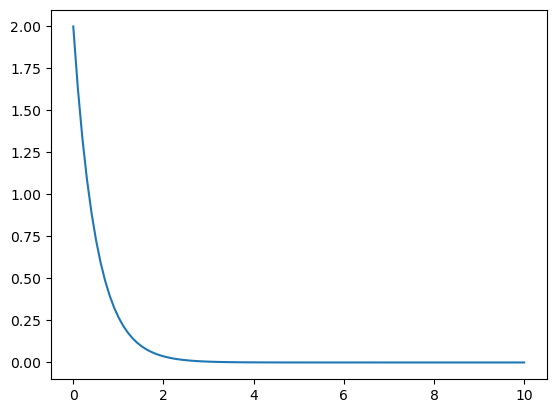

In [134]:
intervels = [Intervals(0., 1.), Intervals(1., 1.), Intervals(1., 10.), Intervals(0., np.inf)]

print(list(map(expon_measure, intervels)))
x = np.linspace(0, 10, 100)
y = expon.pdf(x, scale=1/2)

plt.plot(x, y)
plt.show()

### Comparing the reslutant values with a plot of PDF of an exponential distribution, they are similar
#### 1. '0.8646647167633873' is in the intertvel [0, 1] 
#### 2. '0.0' for the intervel [1, 1] as there is no difference in cdf values
#### 3. '0.13533528117545912' is in the intertvel [0, 10] as the PDF tapers off
#### 4. '1.0' is the total probality as it's in the intervel [0, np.inf]

# Question 4

In [135]:
from matplotlib import scale
import scipy.integrate as integrate

[integrate.quad(lambda x: expon.pdf(x, scale=1/2), intervel.a, intervel.b)[0] for intervel in intervels]

[0.8646647167633873, 0.0, 0.1353352811754591, 0.9999999999999999]

### The values are quite similar to the results form Question 3 bar minute errors due to the implementation of integration function.